![](https://i.pinimg.com/564x/8c/5b/19/8c5b19fa3586a4edf445105373546a80.jpg)

In [1]:
import os
from torchvision import datasets, transforms
from torchvision.utils import save_image
from torch.utils.data import DataLoader, ConcatDataset

# Define paths
root_dir = "./data/mnist_images"
train_dir = os.path.join(root_dir, "train")
test_dir = os.path.join(root_dir, "test")

# Create image transform
transform = transforms.ToTensor()

# Download datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

combined_dataset = ConcatDataset([train_dataset, test_dataset])
# Create directories for each class
def create_class_dirs(base_dir):
    for label in range(10):
        os.makedirs(os.path.join(base_dir, str(label)), exist_ok=True)

create_class_dirs(root_dir)
#create_class_dirs(test_dir)

# Save images to appropriate directories
def save_images(dataset, base_dir):
    for idx, (img, label) in enumerate(dataset):
        file_path = os.path.join(base_dir, str(label), f"{idx}.png")
        save_image(img, file_path)

print("Saving training images...")
#save_images(combined_dataset, root_dir)
print("Saving test images...")
#save_images(test_dataset, test_dir)
print("Done!")

Saving training images...
Saving test images...
Done!


## **Diving into the Data**🤿

* The dataset consists of 30000 audio samples of spoken digits (0-9) of 60 folders and 500 files each.

* There is one directory per speaker holding the audio recordings.

* Additionally "audioMNIST_meta.txt" provides meta information such as gender or age of each speaker.

<div class="alert alert-block alert-info"> 📌 Please Upvote🔺🔺 and leave a comment💬 if you found this interesting💡 and useful.😀</div>

In [2]:
from IPython.core.display import display, HTML, Javascript

# ----- Notebook Theme -----
color_map = ['#6166B3', '#e8eff6', '#0b2553']

prompt = color_map[-1]
main_color = color_map[0]

css_file = '''

    div #notebook {
    background-color: white;
    line-height: 20px;
    }

    #notebook-container {
    %s
    margin-top: 2em;
    padding-top: 2em;
    border-top: 4px solid %s; /* light orange */
    -webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5); /* pink */
    }

    div .input {
    margin-bottom: 1em;
    }

    .rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
    color: %s; /* light orange */
    font-weight: 600;
    }

    div.input_area {
    border: none;
        background-color: %s; /* rgba(229, 143, 101, 0.1); light orange [exactly #E58F65] */
        border-top: 2px solid %s; /* light orange */
    }

    div.input_prompt {
    color: %s; /* light blue */
    }

    div.output_prompt {
    color: %s; /* strong orange */
    }

    div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
    background: %s; /* light orange */
    }

    div.cell.selected, div.cell.selected.jupyter-soft-selected {
        border-color: %s; /* light orange */
    }

    .edit_mode div.cell.selected:before {
    background: %s; /* light orange */
    }

    .edit_mode div.cell.selected {
    border-color: %s; /* light orange */

    }
    '''
def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, main_color,  main_color, prompt, main_color, main_color, main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()

C:\Users\aghalkha21\AppData\Local\Temp\ipykernel_12616\111401022.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, Javascript


## Importing Libraries🚀

In [1]:
# For Audio Preprocessing
import librosa
import librosa.display as dsp
from IPython.display import Audio

# For Data Preprocessing
import pandas as pd
import numpy as np
import os

# For data viz
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
sns.set_style("dark")

## Let's read and check some of the audio samples🔎

In [3]:
def get_audio(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"./data/mnist_audio/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"./data/mnist_audio/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)
    
    # Plot the audio wave
    dsp.waveshow(data,sr=sample_rate)
    plt.show()
    
    # Show the widget
    return Audio(data=data,rate=sample_rate)

## Visualizing the spectogram of our audio data🔮

#### What is a spectogram ?

A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.

In [7]:
# A function which return audio file for a mentioned digit
def get_audio_raw(digit=0):
    # Audio Sample Directory
    sample = np.random.randint(1,60)
    # Index of Audio
    index = np.random.randint(1,5)
    
    # Modified file location
    if sample<10:
        file = f"./data/mnist_audio/0{sample}/{digit}_0{sample}_{index}.wav"
    else:
        file = f"./data/mnist_audio/{sample}/{digit}_{sample}_{index}.wav"

    
    # Get Audio from the location
    data,sample_rate = librosa.load(file)

    # Return audio
    return data,sample_rate

In [8]:
def spectogram_of(digit):
    # Read the audio file
    data,sr = get_audio_raw(digit)
    # Apply Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    # Plot the transformed data
    librosa.display.specshow(S_db,x_axis='time',y_axis='log')
    plt.show()

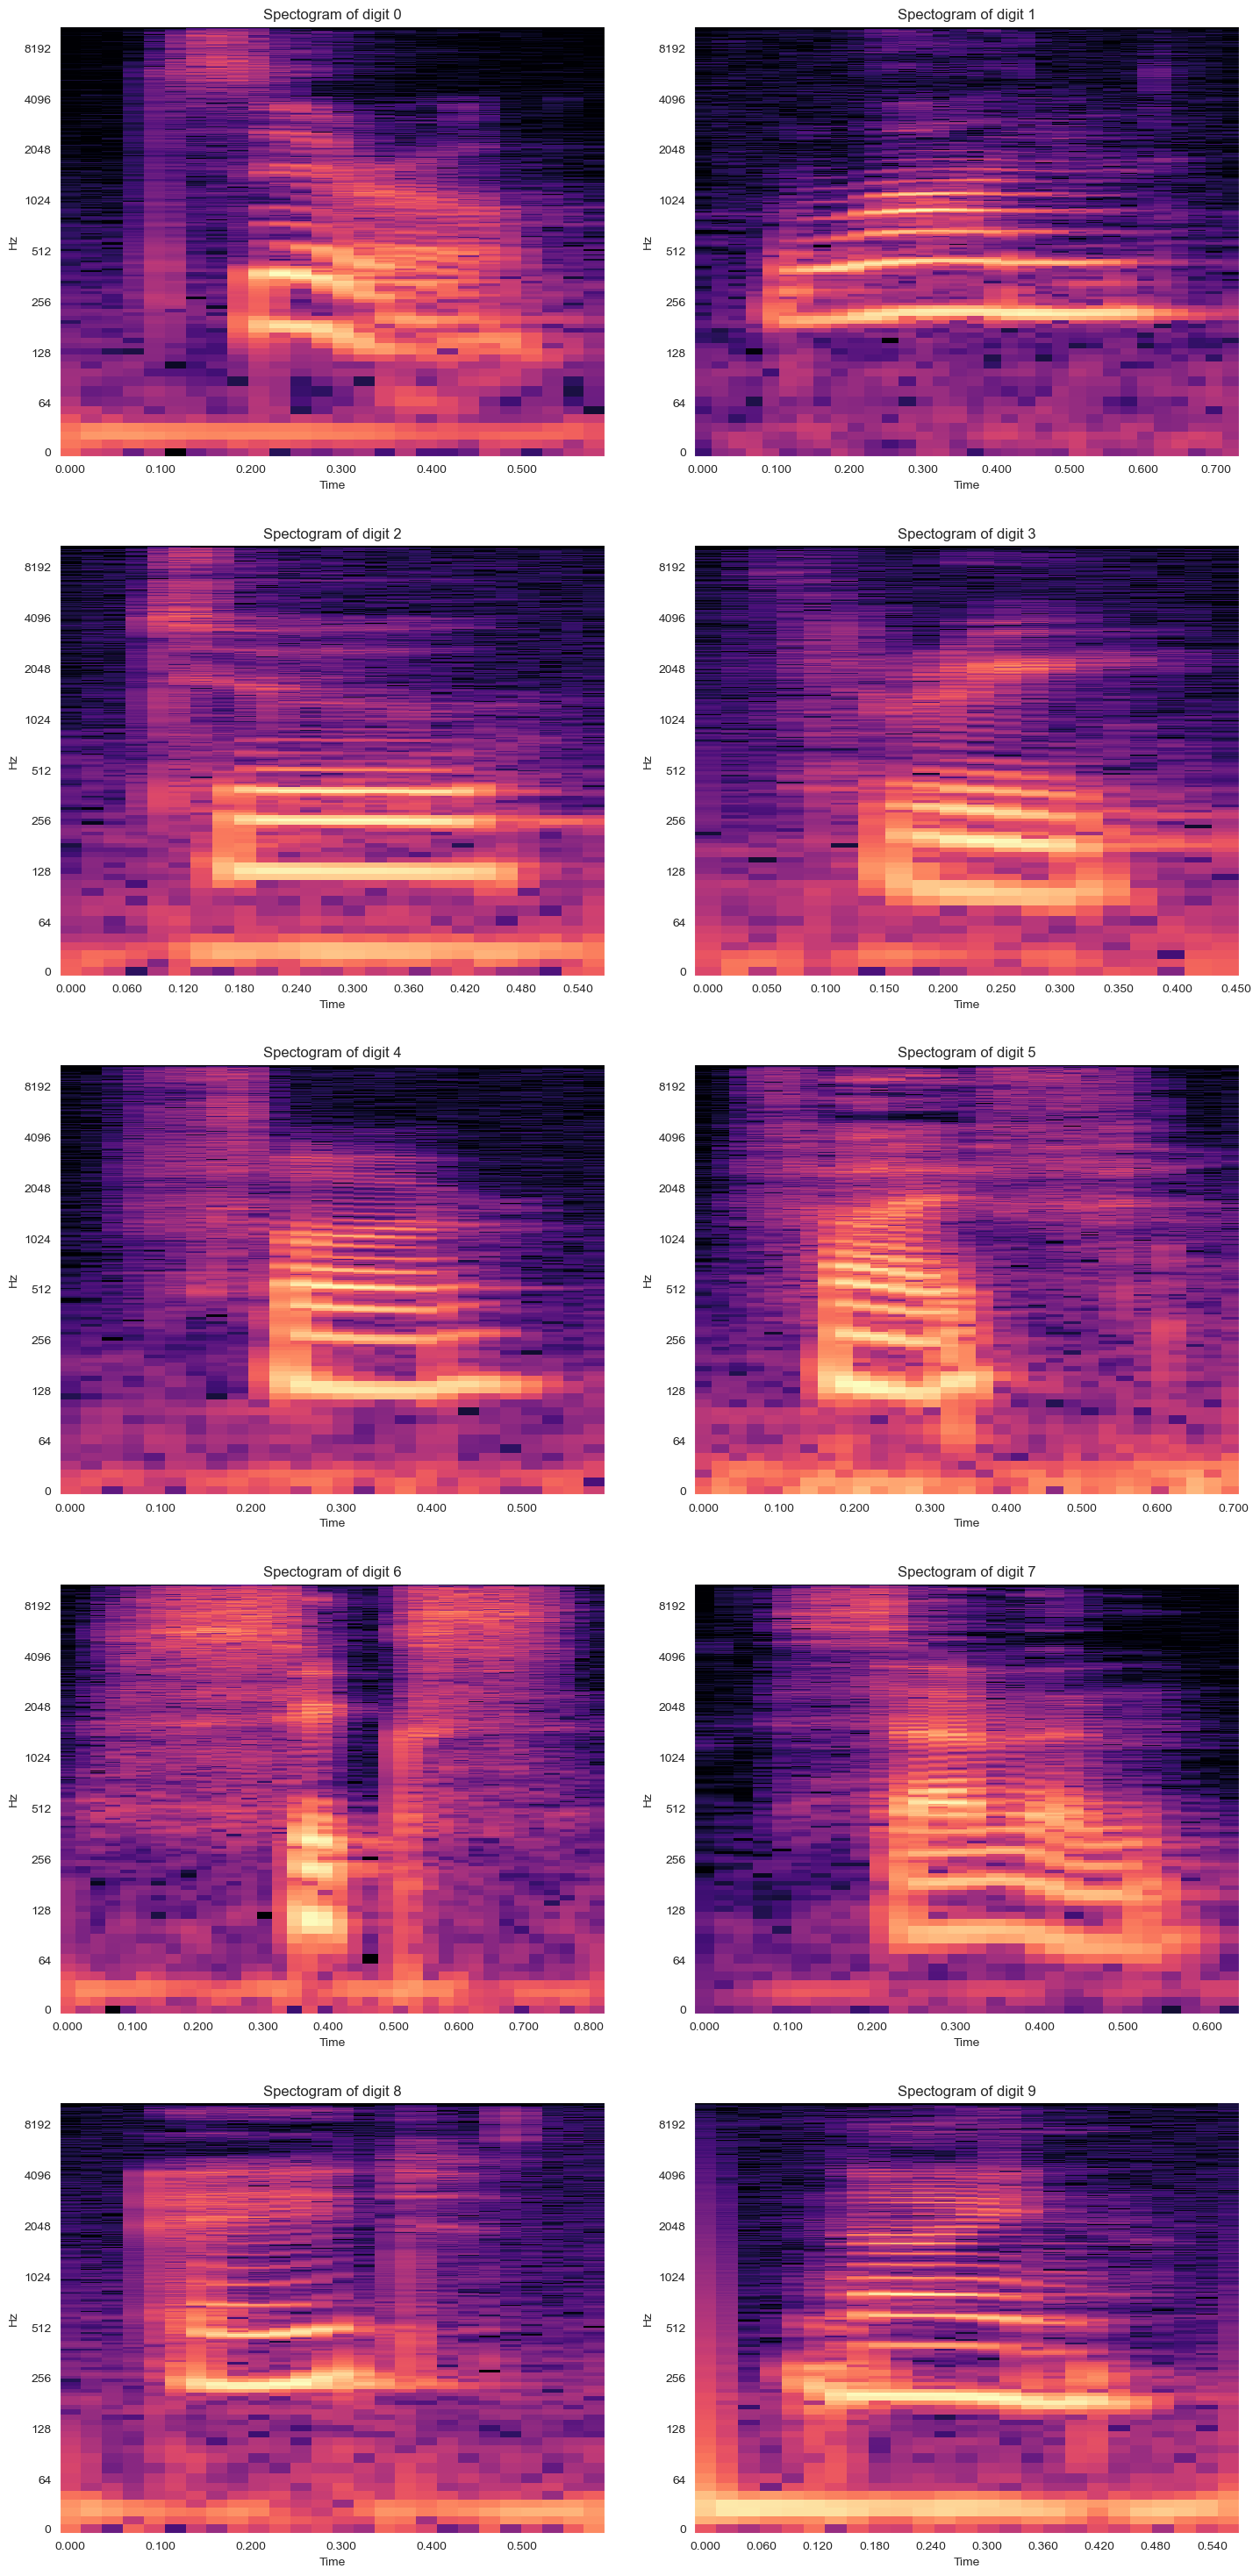

In [9]:
# Creating subplots
fig,ax = plt.subplots(5,2,figsize=(15,30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):  
    # Read the audio file
    data,sr = get_audio_raw(digit)
    # Apply Short-Time-Fourier-Transformer to transform data
    D = librosa.stft(data)
    # Converting frequency to decible
    S_db = librosa.amplitude_to_db(np.abs(D),ref=np.max)
    # Plot the transformed data
    ax[row,column].set_title(f"Spectogram of digit {digit}")
    librosa.display.specshow(S_db,x_axis='time',y_axis='log',ax=ax[row,column])
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad=3)   
plt.show()

## Extracting features from the audio file🥤

#### Create a function that extracts the data from audio files

In [14]:
# will take a audio file as input and output extracted features using MEL_FREQUENCY CEPSTRAL COEFFICIENT
def extract_features(file):
    # Load audio and sample rate of audio
    audio,sample_rate = librosa.load(file)
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio,
                                              sr=sample_rate,
                                              n_mfcc=40)
    
    # Scale the extracted features
    extracted_features = np.mean(extracted_features.T,axis=0)
    # Return the extracted features
    return extracted_features


def preprocess_and_create_dataset():
    # Path of folder where the audio files are present
    root_folder_path = "./data/mnist_audio/"
    # Empth List to create dataset
    dataset = []
    
    # Iterating through folders where each folder has audio of each digit
    for folder in tqdm(range(1,61),colour='green'):
        if folder<10:
            # Path of the folder
            folder = os.path.join(root_folder_path,"0"+str(folder))
        else:
            folder = os.path.join(root_folder_path,str(folder))
            
        # Iterate through each file of the present folder
        for file in os.listdir(folder):
            # Path of the file
            abs_file_path = os.path.join(folder,file)
            # Pass path of file to extracted_features() function to create features
            extracted_features = extract_features(abs_file_path) 
            # Class of the audio,i.e., the digit it represents
            class_label = file[0]
            
            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features,class_label])
    
    # After iterating through all the folder convert the list to a dataframe
    print("Extracted Features and Created Dataset Successfully !!")
    return pd.DataFrame(dataset,columns=['features','class'])

def preprocess_and_create_multimodaldataset():
    # Path of folder where the audio files are present
    root_folder_path = "./data/mnist_audio/"
    # Empth List to create dataset
    dataset = []
    
    # Iterating through folders where each folder has audio of each digit
    for folder in tqdm(range(1,61),colour='green'):
        if folder<10:
            # Path of the folder
            folder = os.path.join(root_folder_path,"0"+str(folder))
        else:
            folder = os.path.join(root_folder_path,str(folder))
            
        # Iterate through each file of the present folder
        for file in os.listdir(folder):
            # Path of the file
            abs_file_path = os.path.join(folder,file)
            # Pass path of file to extracted_features() function to create features
            extracted_features = extract_features(abs_file_path) 
            # Class of the audio,i.e., the digit it represents
            class_label = file[0]
            
            # Append a list where the feature represents a column and class of the digit represents another column
            dataset.append([extracted_features,class_label])
    
    # After iterating through all the folder convert the list to a dataframe
    print("Extracted Features and Created Dataset Successfully !!")
    return pd.DataFrame(dataset,columns=['features','class'])

## Create the dataset using the defined function✨

In [15]:
# Create the dataset by calling the function
dataset = preprocess_and_create_dataset()

100%|██████████| 60/60 [12:11<00:00, 12.19s/it]

Extracted Features and Created Dataset Successfully !!


In [20]:
dataset_split = dataset["features"].apply(pd.Series)
dataset_split.columns = ["feature" + str(i) for i in range(len(dataset_split.columns))]
dataset_split["class"] = pd.to_numeric(dataset["class"])


In [21]:

# View the head of the dataframe
dataset_split.head()

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39,class
0,-617.908264,101.589767,9.847578,26.403584,25.784245,1.755381,7.380787,-12.520157,8.840893,-0.251336,...,1.561211,-3.261531,3.752020,-1.915234,-1.827078,-2.776441,2.127649,0.283704,-0.362988,0
1,-636.503845,104.663483,18.785160,32.966637,32.188751,5.560347,2.799065,-8.271547,8.137912,-4.781163,...,2.591270,-0.526549,1.419235,-0.246682,-0.890081,-5.292832,4.069287,0.772300,2.229786,0
2,-600.729553,100.824333,3.306875,20.441507,27.031813,2.805102,7.517792,-12.253216,4.049151,-2.950716,...,4.531131,-3.493665,1.765706,-1.252896,-1.452544,-4.556331,3.329124,-0.401874,1.102327,0
3,-591.326294,110.810883,2.862722,20.751930,25.868662,-0.488132,-4.731595,-16.296522,4.120318,2.255771,...,1.726724,-1.963178,0.605708,-2.856485,0.433533,-1.704196,1.299239,-0.282075,0.257796,0
4,-619.836182,97.751701,19.811029,26.886065,20.381250,5.995906,-1.315153,-11.737551,5.809255,-2.680438,...,1.422735,-3.206312,1.513105,0.643656,2.057761,-3.236130,0.692797,-2.332294,1.293126,0


In [22]:
dataset_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 41 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature0   30000 non-null  float32
 1   feature1   30000 non-null  float32
 2   feature2   30000 non-null  float32
 3   feature3   30000 non-null  float32
 4   feature4   30000 non-null  float32
 5   feature5   30000 non-null  float32
 6   feature6   30000 non-null  float32
 7   feature7   30000 non-null  float32
 8   feature8   30000 non-null  float32
 9   feature9   30000 non-null  float32
 10  feature10  30000 non-null  float32
 11  feature11  30000 non-null  float32
 12  feature12  30000 non-null  float32
 13  feature13  30000 non-null  float32
 14  feature14  30000 non-null  float32
 15  feature15  30000 non-null  float32
 16  feature16  30000 non-null  float32
 17  feature17  30000 non-null  float32
 18  feature18  30000 non-null  float32
 19  feature19  30000 non-null  float32
 20  featur

In [ ]:
dataset['class'] = [int(x) for x in dataset['class']]

In [ ]:
# Check the frequency of classes of audio
dataset['class'].value_counts()

In [24]:
dataset_split.to_csv("./data/mnist_audio/mnist_audio.csv")

In [41]:
import glob
dataset_images_list = []
for i in range(10):
    files = glob.glob("./data/mnist_images/" + str(i) + "/*.png")
    df = pd.DataFrame({"path": files})
    df["class"] = i
    dataset_images_list.append(df)
dataset_images = pd.concat(dataset_images_list,axis=0)
dataset_images.head()

,path,class
0,./data/mnist_images/0\1.png,0
1,./data/mnist_images/0\10.png,0
2,./data/mnist_images/0\1000.png,0
3,./data/mnist_images/0\10005.png,0
4,./data/mnist_images/0\1001.png,0


In [59]:
merged_dataset = []

for i in range(10):
    tempdf1 = dataset_split[dataset_split["class"] == i].reset_index(drop=True)
    tempdf2 = dataset_images[dataset_images["class"] == i].reset_index(drop=True)
    tempdf1.drop(columns=["class"], inplace=True)

    min_len = min(len(tempdf1), len(tempdf2))

    merged_dataset.append(pd.concat([tempdf1.iloc[:min_len], tempdf2.iloc[:min_len]], axis=1))
merged_dataset = pd.concat(merged_dataset, axis=0)

In [60]:
merged_dataset.to_csv("./data/multimodal_dataset.csv")

## Visualizing the Mel Frequency Cepstrum Coefficients Using a Spectogram🌃

In [25]:
# A function which return MFCC
def extract_features_without_scaling(audio_data,sample_rate):
    # Extract features using mel-frequency coefficient
    extracted_features = librosa.feature.mfcc(y=audio_data,
                                              sr=sample_rate,
                                              n_mfcc=40)
    
    # Return Without Scaling
    return extracted_features

In [ ]:
# Creating subplots
fig,ax = plt.subplots(5,2,figsize=(15,30))

# Initializing row and column variables for subplots
row = 0
column = 0

for digit in range(10):  
    # Get Audio of different class(0-9)
    audio_data,sample_rate = get_audio_raw(digit)
    
    # Extract Its MFCC
    mfcc = extract_features_without_scaling(audio_data,sample_rate)
    print(f"Shape of MFCC of audio digit {digit} ---> ",mfcc.shape)
    
    # Display the plots and its title
    ax[row,column].set_title(f"MFCC of audio class {digit} across time")
    librosa.display.specshow(mfcc,sr=22050,ax=ax[row,column])
    
    # Set X-labels and y-labels
    ax[row,column].set_xlabel("Time")
    ax[row,column].set_ylabel("MFCC Coefficients")
    
    # Conditions for positioning of the plots
    if column == 1:
        column = 0
        row += 1
    else:
        column+=1
        
    
plt.tight_layout(pad=3)   
plt.show()

## Perform Train-Test-Split🚀

In [ ]:
# Import Train Test Split
from sklearn.model_selection import train_test_split
# Seperate the audio and its class as X and Y
X = np.array(dataset['features'].to_list())
Y = np.array(dataset['class'].to_list())

# Create train set and test set
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.75,shuffle=True,random_state=8)

In [ ]:
# Chekcing the shape of the data
X_train.shape

## **Modelling**🤖

### Import Libraries

In [ ]:
# Import create an ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# To create a checkpoint and save the best model
from tensorflow.keras.callbacks import ModelCheckpoint

# To load the model
from tensorflow.keras.models import load_model

# To check the metrics of the model
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelBinarizer

### Model Creation🚩

In [ ]:
# Crete a Sequential Object
model = Sequential()
# Add first layer with 100 neurons to the sequental object
model.add(Dense(100,input_shape=(40,),activation='relu'))
# Add second layer with 200 neurons to the sequental object
model.add(Dense(100,activation='relu'))
# Add third later with 100 neurons to the sequental object
model.add(Dense(100,activation='relu'))

# Output layer With 10 neurons as it has 10 classes
model.add(Dense(10,activation='softmax'))

In [ ]:
# Print Summary of the model
model.summary()

In [ ]:
# Compile the model
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

### Model Checkpoint & Training🚩

In [ ]:
# Create a model checkpoint
#checkpoint = ModelCheckpoint(filepath='D:/DATA SCIENCE/Kaggle Datasets/MNIST AUDIO/archive/MNIST Audio Classifier.hdf5',
 #                            verbose=1,save_best_only=True)

# Set the number of epochs for training
num_epochs = 100
# Set the batch size for training
batch_size = 32

# Fit the model
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=num_epochs,batch_size=batch_size,verbose=1)

### Model Evaluation✅

In [ ]:
# Make predictions on test set
Y_pred = model.predict(X_test)
Y_pred = [np.argmax(i) for i in Y_pred]

In [ ]:
# Print the metrics
print(classification_report(Y_test,Y_pred))

In [ ]:
# Set style as dark
sns.set_style("dark")
# Set figure size
plt.figure(figsize=(15,8))

# Plot the title
plt.title("CONFUSION MATRIX FOR MNIST AUDIO PREDICTION")
# Confusion matrix
cm = confusion_matrix([int(x) for x in Y_test],Y_pred)
# Plot confusion matrix as heatmap
sns.heatmap(cm, annot=True, cmap="cool", fmt='g', cbar=False)
# Set x-label and y-label
plt.xlabel("ACTUAL VALUES")
plt.ylabel("PREDICTED VALUES")

# Plot the plot
plt.show()

<div class="alert alert-block alert-info"> 📌 Hurray !!!🎉🎉 we have successfully✅ completed the project. We saw how to plot the spectogram of audio data, how to extract the mel-frequency corellation coefficient, and how to plot MFCC and how to train a Neural Network which can classify any spoken MNIST digit with a mind whopping accuracy of ~98%</div>

<div class="alert alert-block alert-info"> 📌 I hope you this was helpful✨, and thank you very much for checking this notebook. Please Upvote🔺🔺 and leave a comment💬 if you found this interesting💡 and useful.😀</div>